CHECK THE DATA ANALYSIS DONE IN THE DATA ANALYSIS AND ML FILE

HERE I HAVE USED THE DATA PROCESSED TO CREATE A ANN USING TENSORFLOW AND KERAS

In [16]:

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Dropout



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/train_dl.csv")
df.head()


,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,4,27,0,1,2,1,47,1.0,6,1,0,55,0
1,7,31,0,1,0,1,38,3.0,9,0,0,54,0
2,8,27,3,1,2,1,37,3.0,3,1,0,76,0
3,7,10,0,1,2,1,30,4.0,4,0,0,41,0
4,5,22,0,1,2,1,35,3.0,10,0,0,68,0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
x=df.drop('is_promoted',axis=1)

In [6]:
x.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,4,27,0,1,2,1,47,1.0,6,1,0,55
1,7,31,0,1,0,1,38,3.0,9,0,0,54
2,8,27,3,1,2,1,37,3.0,3,1,0,76
3,7,10,0,1,2,1,30,4.0,4,0,0,41
4,5,22,0,1,2,1,35,3.0,10,0,0,68


In [7]:
y=df['is_promoted']

In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [9]:
scaler = StandardScaler()
x=scaler.fit_transform(x)

In [10]:
print(x)

[[-0.43900775  1.25380808 -0.63637676 ...  1.2026193  -0.16054603
  -0.63852796]
 [ 0.77418503  1.64710668 -0.63637676 ... -0.83151834 -0.16054603
  -0.71269343]
 [ 1.17858262  1.25380808  1.66593705 ...  1.2026193  -0.16054603
   0.91894676]
 ...
 [ 1.17858262 -0.90933426 -0.63637676 ... -0.83151834 -0.16054603
   1.51227046]
 [-0.43900775  1.54878203 -0.63637676 ... -0.83151834 -0.16054603
  -0.26770065]
 [-1.24780294  0.76218482 -0.63637676 ...  1.2026193  -0.16054603
   1.06727769]]


In [21]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=25)
from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)




In [22]:
model = Sequential()

model.add(Dense(100, input_shape=(12,), activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(2,input_shape=(12,),activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train_one_hot, epochs=15, batch_size=32, validation_data=(X_test, y_test_one_hot))

Epoch 1/15
3897/3897 [==============================] - 12s 3ms/step - loss: 0.3774 - accuracy: 0.8613 - val_loss: 0.3727 - val_accuracy: 0.8603
Epoch 2/15
3897/3897 [==============================] - 10s 3ms/step - loss: 0.3707 - accuracy: 0.8627 - val_loss: 0.3711 - val_accuracy: 0.8608
Epoch 3/15
3897/3897 [==============================] - 11s 3ms/step - loss: 0.3694 - accuracy: 0.8626 - val_loss: 0.3708 - val_accuracy: 0.8607
Epoch 4/15
3897/3897 [==============================] - 10s 3ms/step - loss: 0.3681 - accuracy: 0.8627 - val_loss: 0.3712 - val_accuracy: 0.8615
Epoch 5/15
3897/3897 [==============================] - 11s 3ms/step - loss: 0.3677 - accuracy: 0.8636 - val_loss: 0.3691 - val_accuracy: 0.8616
Epoch 6/15
3897/3897 [==============================] - 9s 2ms/step - loss: 0.3671 - accuracy: 0.8637 - val_loss: 0.3690 - val_accuracy: 0.8615
Epoch 7/15
3897/3897 [==============================] - 10s 3ms/step - loss: 0.3671 - accuracy: 0.8633 - val_loss: 0.3692 - val_acc

975/975 [==============================] - 2s 2ms/step
Confusion matrix:
 [[26336   272]
 [ 4063   499]]
ROC AUC score: 0.9107124734025555


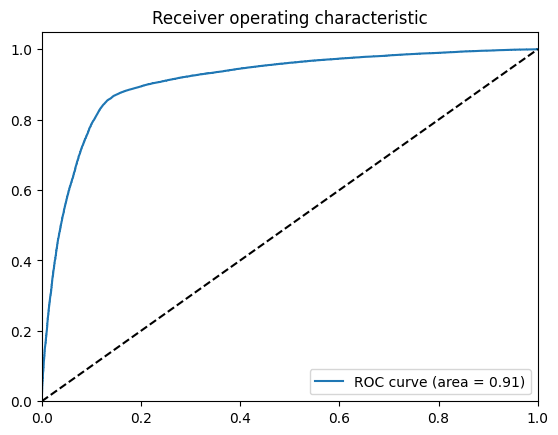

In [30]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test_one_hot, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
print('Confusion matrix:\n', cm)


fpr, tpr, thresholds = roc_curve(y_test_one_hot.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
print('ROC AUC score:', roc_auc)


plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


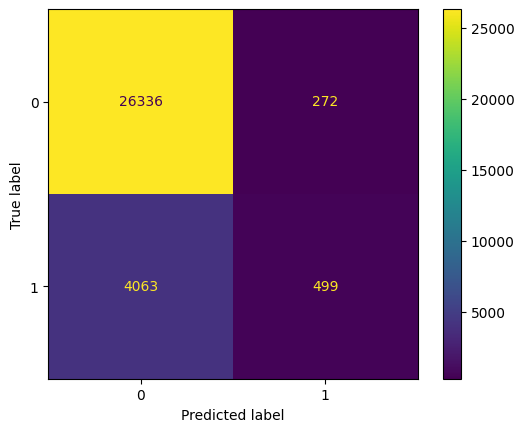

In [26]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

FINAL ROC AUC SCORE FOR MY MODEL:0.9107124734025555

PREDICTION FOR TEST_DL.CSV

In [31]:
dftest = pd.read_csv("/content/drive/MyDrive/test_dl.csv")
dftest.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,31,3,1,0,2,46,4.0,2,1,0,43
1,0,28,0,1,0,1,37,5.0,10,1,0,76
2,4,11,2,1,0,1,40,5.0,9,1,0,58
3,5,30,0,0,0,1,33,5.0,3,1,1,69
4,0,2,0,1,0,2,30,4.0,3,1,0,86


In [32]:
x=dftest
x=scaler.fit_transform(x)

In [33]:
print(x)

[[ 0.7788964   1.64953455  1.68315238 ...  1.20838246 -0.16171863
  -1.53793518]
 [-2.05261793  1.35409666 -0.62963136 ...  1.20838246 -0.16171863
   0.92279862]
 [-0.43460974 -0.3200514   0.91222446 ...  1.20838246 -0.16171863
  -0.41941982]
 ...
 [-0.43460974 -1.20636507 -0.62963136 ... -0.82755256 -0.16171863
  -0.34485213]
 [ 1.18339845 -0.1230928  -0.62963136 ...  1.20838246 -0.16171863
  -0.12114905]
 [ 0.7788964   0.96017947 -0.62963136 ...  1.20838246 -0.16171863
  -1.09052904]]


In [34]:
model.predict(x)

1218/1218 [==============================] - 2s 2ms/step


array([[0.87934506, 0.12063037],
       [0.8061154 , 0.1938881 ],
       [0.803896  , 0.19609003],
       ...,
       [0.92686284, 0.07312182],
       [0.848169  , 0.15184206],
       [0.85569215, 0.14427032]], dtype=float32)

we got probabilty for each employee to get promoted or not promoted

In [46]:
x.shape

(38962, 12)

In [44]:
count=0
for i in x:
  if i[0]>0.5:
      count+=1
print(count)      

17555
